In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import tensorflow as tf
import streamlit as st
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.9.1


In [4]:
df = yf.download('LNG', '2012-01-01', '2022-02-22')

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.89,8.97,8.70,8.75,8.615541,2716100
2012-01-04,8.72,8.85,8.63,8.76,8.625389,2358200
2012-01-05,8.80,9.31,8.70,9.30,9.157090,4555600
2012-01-06,9.33,9.78,8.99,9.00,8.861701,4081300
2012-01-09,9.02,9.15,8.74,8.79,8.654927,2127100


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-14,119.470001,120.379997,115.290001,116.889999,115.788048,1826000
2022-02-15,114.010002,116.620003,112.089996,113.989998,112.915398,2120500
2022-02-16,114.730003,117.160004,114.449997,114.889999,113.806915,1346300
2022-02-17,116.410004,117.750000,114.260002,115.879997,114.787575,2026200
2022-02-18,115.650002,116.370003,114.129997,116.019997,114.926254,1634800


In [7]:
backupdf = df

In [8]:
df=df[['Close']]

In [9]:
df.isnull().sum()

Close    0
dtype: int64

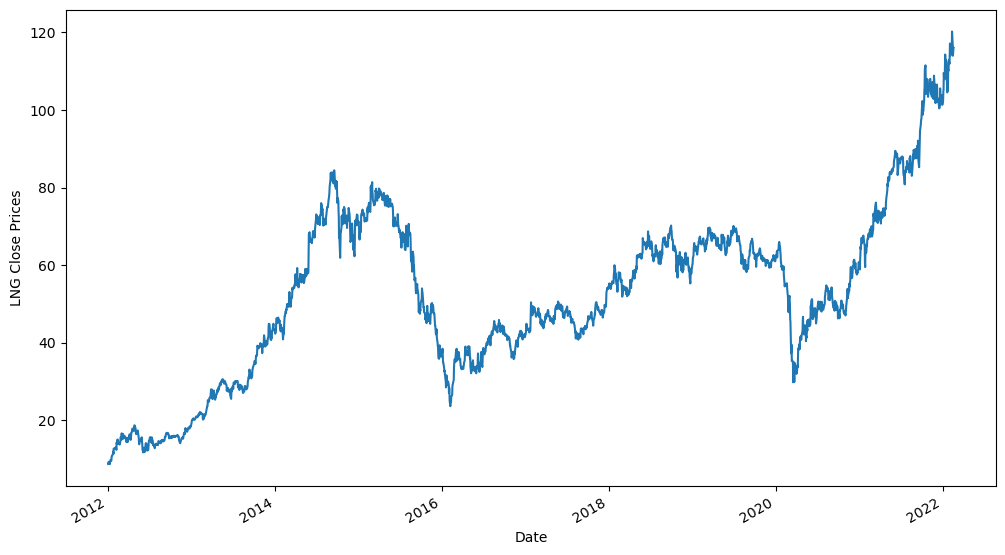

In [10]:
df.Close.plot(figsize=(12, 7))
plt.ylabel("LNG Close Prices")
plt.show()

In [11]:
backupdf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.89,8.97,8.70,8.75,8.615541,2716100
2012-01-04,8.72,8.85,8.63,8.76,8.625389,2358200
2012-01-05,8.80,9.31,8.70,9.30,9.157090,4555600
2012-01-06,9.33,9.78,8.99,9.00,8.861701,4081300
2012-01-09,9.02,9.15,8.74,8.79,8.654927,2127100


In [12]:
fullData = backupdf

In [13]:
fullData.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
trainData = fullData.sample(frac=0.8, random_state =0)
testData = fullData.drop(trainData.index)

In [15]:
testData.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.89,8.97,8.70,8.75,8.615541,2716100
2012-01-06,9.33,9.78,8.99,9.00,8.861701,4081300
2012-01-12,9.12,9.70,9.01,9.46,9.314631,7327600
2012-02-02,12.72,13.10,12.20,12.63,12.435920,6474900
2012-02-07,13.22,13.22,12.64,12.68,12.485151,6646000


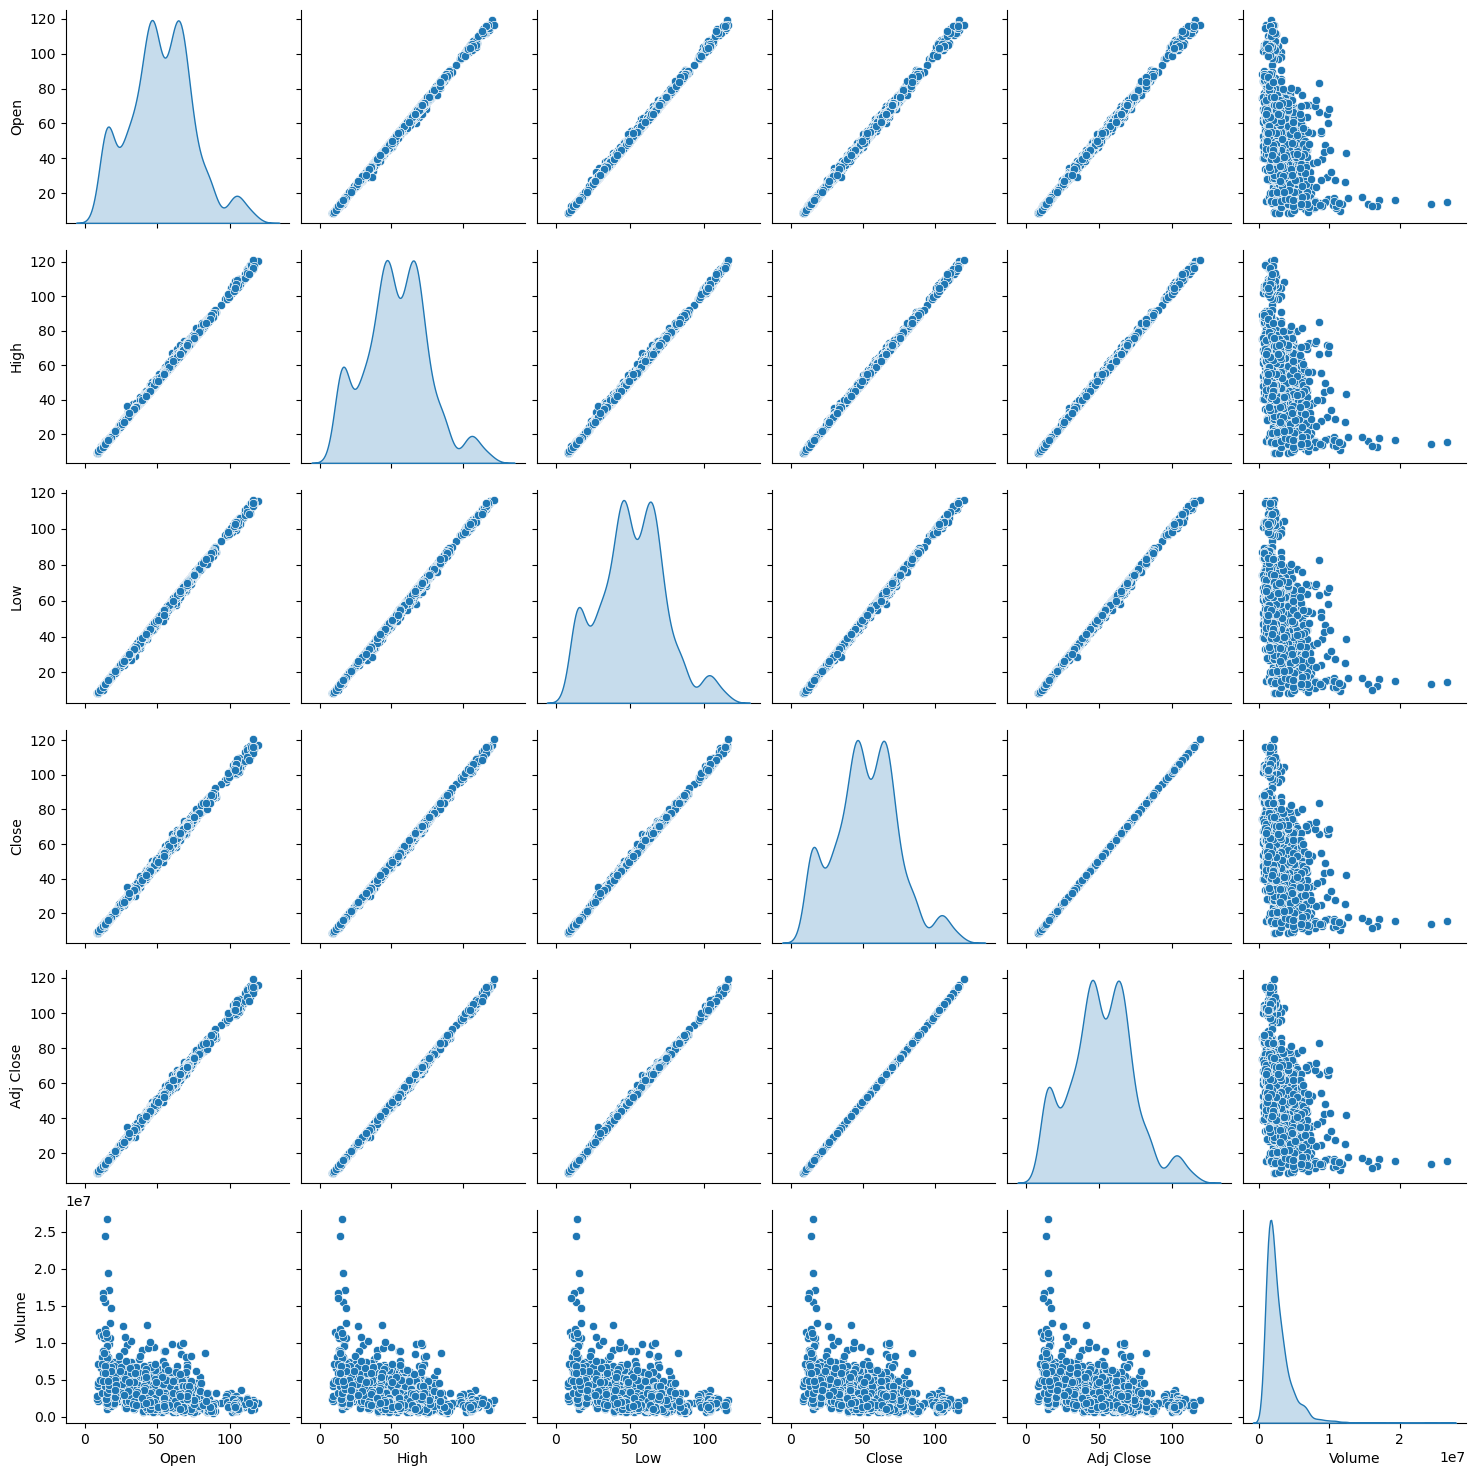

In [16]:
sns.pairplot(trainData[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']], diag_kind='kde')

In [17]:
trainData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,2041.0,5.249519e+01,2.230569e+01,8.60000,3.834000e+01,5.104000e+01,6.661000e+01,1.194700e+02
High,2041.0,5.331212e+01,2.255205e+01,8.85000,3.893000e+01,5.193000e+01,6.738000e+01,1.213100e+02
Low,2041.0,5.167274e+01,2.206592e+01,8.53000,3.710000e+01,5.001000e+01,6.561000e+01,1.161300e+02
Close,2041.0,5.249787e+01,2.229239e+01,8.70000,3.845000e+01,5.089000e+01,6.652000e+01,1.202400e+02
Adj Close,2041.0,5.170385e+01,2.198196e+01,8.56631,3.785915e+01,5.010799e+01,6.549780e+01,1.191065e+02
Volume,2041.0,2.788508e+06,2.020970e+06,495000.00000,1.557700e+06,2.188000e+06,3.348700e+06,2.666820e+07


In [18]:
trainFeatures = trainData.copy()
testFeatures = testData.copy()
train_labels = trainFeatures.pop('High')
test_labels = testFeatures.pop('High')

In [19]:
trainData.describe().transpose()[['mean', 'std']]

,mean,std
Open,5.249519e+01,2.230569e+01
High,5.331212e+01,2.255205e+01
Low,5.167274e+01,2.206592e+01
Close,5.249787e+01,2.229239e+01
Adj Close,5.170385e+01,2.198196e+01
Volume,2.788508e+06,2.020970e+06


In [21]:
backupdf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.89,8.97,8.70,8.75,8.615541,2716100
2012-01-04,8.72,8.85,8.63,8.76,8.625389,2358200
2012-01-05,8.80,9.31,8.70,9.30,9.157090,4555600
2012-01-06,9.33,9.78,8.99,9.00,8.861701,4081300
2012-01-09,9.02,9.15,8.74,8.79,8.654927,2127100
